#Lab08 - Sieci konwolucyjne

In [2]:
from keras.datasets import mnist;
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [4]:
print(x_train.shape)
print(x_train)

(60000, 28, 28, 1)
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0

Liczba  4


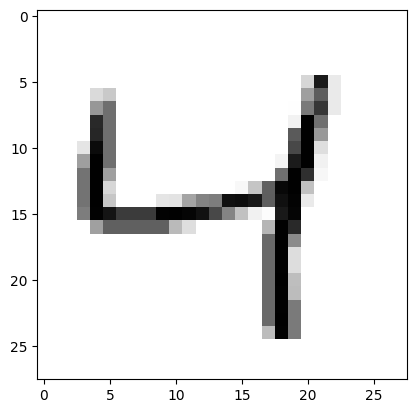

In [5]:
import matplotlib.pyplot as plt
img = train_images[2].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[2])

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add( layers.Input(shape=(28,28,1)))
model.add( layers.Conv2D(32, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)) )
#model.add( layers.Conv2D(64, (3,3), activation='relu') )
#model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy'])
print( model.summary() )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8944 - loss: 0.3789 - val_accuracy: 0.9787 - val_loss: 0.0673
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9803 - loss: 0.0658 - val_accuracy: 0.9791 - val_loss: 0.0652
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9842 - val_loss: 0.0457
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 0.9806 - val_loss: 0.0588
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9857 - val_loss: 0.0445


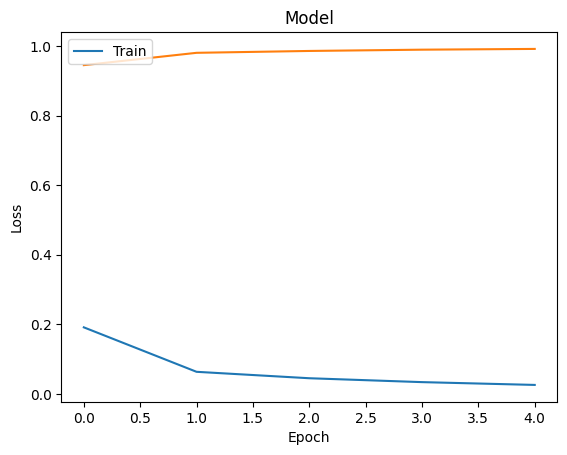

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [13]:
import numpy as np

y_result_test = model.predict(x_test)

print( np.column_stack( (np.argmax(y_result_test,  axis=1), np.argmax(y_test,  axis=1)) ) )
bledy = 0
for i in range(len(y_test)):
  if np.argmax(y_result_test,  axis=1)[i] != np.argmax(y_test,  axis=1)[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
Liczba bledow ciagu treningowego:  143


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
#y_pred = network.predict(x_train)
# Zaokrąglenie wyników przewidywań
#y_pred_rounded = [np.round(pred) for pred in y_pred]

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)


# Obliczenie metryk
accuracy = accuracy_score(train_labels, y_result)
precision = precision_score(train_labels, y_result, average='weighted')
recall = recall_score(train_labels, y_result, average='weighted')
conf_matrix = confusion_matrix(train_labels, y_result)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Accuracy: 0.9948166666666667
Precision: 0.9948316848592463
Recall: 0.9948166666666667
Confusion Matrix:
 [[5916    0    0    0    0    0    5    0    0    2]
 [   1 6681   13    0    4    0    2   16   20    5]
 [   1    1 5942    0    1    0    1    5    4    3]
 [   4    0   19 6062    0    7    0    7   16   16]
 [   0    1    1    0 5823    0    2    2    2   11]
 [   4    0    3    3    1 5393    5    0    6    6]
 [   3    1    0    0    2    2 5909    0    1    0]
 [   1    2   10    1    1    4    1 6229    8    8]
 [   5    1    3    1    2    2    4    1 5825    7]
 [   6    1    1    0    9    1    0   17    5 5909]]


## Zadanie 2 - rozpoznawanie obrazow

In [17]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
num_classes = 10
y_train_labels = to_categorical(train_labels, num_classes)
y_test_labels = to_categorical(test_labels, num_classes)

In [28]:
x_train = train_images.astype('float32') / 255.0
x_test = test_images.astype('float32') / 255.0

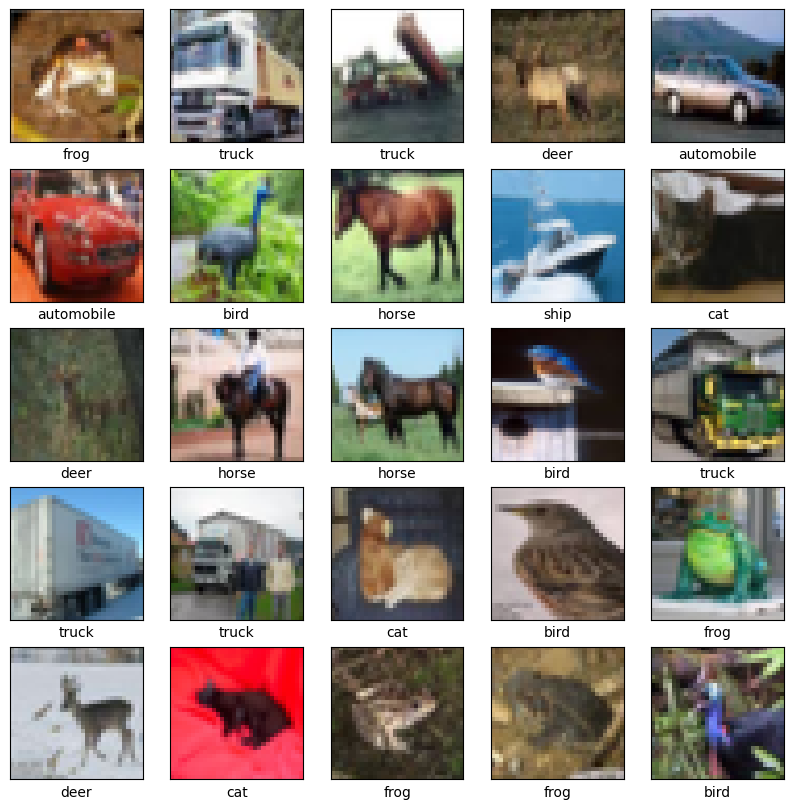

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=[10,10])
for i in range (25): # pierwsze 25 obrazków
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()


In [30]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(32,32,3)) )
model.add( layers.Conv2D(32, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(64, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(128, (3,3), activation='relu') )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(128,activation='relu') )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print( model.summary() )

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
y_train = y_train_labels
y_test = y_test_labels

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2941 - loss: 1.9054 - val_accuracy: 0.5193 - val_loss: 1.3216
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5430 - loss: 1.2858 - val_accuracy: 0.5627 - val_loss: 1.2258
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6314 - loss: 1.0532 - val_accuracy: 0.6478 - val_loss: 0.9980
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6884 - loss: 0.8888 - val_accuracy: 0.6153 - val_loss: 1.1622
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7257 - loss: 0.7824 - val_accuracy: 0.6731 - val_loss: 0.9361


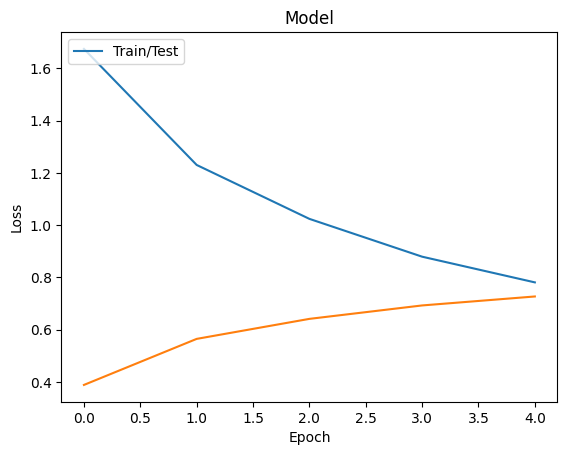

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train/Test'], loc='upper left')
plt.show()

In [36]:
import numpy as np

y_result_test = model.predict(x_test)

print( np.column_stack( (np.argmax(y_result_test,  axis=1), np.argmax(y_test,  axis=1)) ) )
bledy = 0
for i in range(len(y_test)):
  if np.argmax(y_result_test,  axis=1)[i] != np.argmax(y_test,  axis=1)[i]:
    bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[3 3]
 [8 8]
 [8 8]
 ...
 [5 5]
 [1 1]
 [7 7]]
Liczba bledow ciagu treningowego:  3269


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
#y_pred = network.predict(x_train)
# Zaokrąglenie wyników przewidywań
#y_pred_rounded = [np.round(pred) for pred in y_pred]

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)


# Obliczenie metryk
accuracy = accuracy_score(train_labels, y_result)
precision = precision_score(train_labels, y_result, average='weighted')
recall = recall_score(train_labels, y_result, average='weighted')
conf_matrix = confusion_matrix(train_labels, y_result)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.73854
Precision: 0.7604839578054783
Recall: 0.73854
Confusion Matrix:
 [[3419  172  534   34   35   17   63   53  609   64]
 [  20 4642   22    9   10    7   53   18  145   74]
 [ 119   49 3833   65  103  128  482  126   77   18]
 [  51   78  672 1944  117  812  950  214  143   19]
 [  71   28  798   86 2712  103  617  509   63   13]
 [  23   22  557  331  106 3211  411  282   44   13]
 [   5   39  178   48   20   24 4622   23   29   12]
 [  22   17  219   76   69  119   74 4355   24   25]
 [  79  100   75   18    5   16   39   22 4618   28]
 [ 114  808   43   27   11   24   90   79  233 3571]]


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# Przewidywanie wyników
#y_pred = network.predict(x_train)
# Zaokrąglenie wyników przewidywań
#y_pred_rounded = [np.round(pred) for pred in y_pred]

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)


# Obliczenie metryk
accuracy = accuracy_score(test_labels, y_result)
precision = precision_score(test_labels, y_result, average='weighted')
recall = recall_score(test_labels, y_result, average='weighted')
conf_matrix = confusion_matrix(test_labels, y_result)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6731
Precision: 0.6958163689826755
Recall: 0.6731
Confusion Matrix:
 [[629  46 111   5  13   2  23  14 139  18]
 [ 11 875   7   1   3   4  24   4  41  30]
 [ 39   8 695  17  22  39 118  37  21   4]
 [ 11  18 172 322  38 158 189  46  36  10]
 [ 14   5 195  16 419  28 164 136  21   2]
 [  7  12 125  80  27 568  78  86  11   6]
 [  2  10  54   6   6   5 891  13  11   2]
 [ 10   7  57  16  23  46  18 807   6  10]
 [ 27  32  18   4   3   8   8   3 886  11]
 [ 27 193  18  11   5   8  17  26  56 639]]


In [48]:
incorrect_indices = np.where(y_result != train_labels)[0]

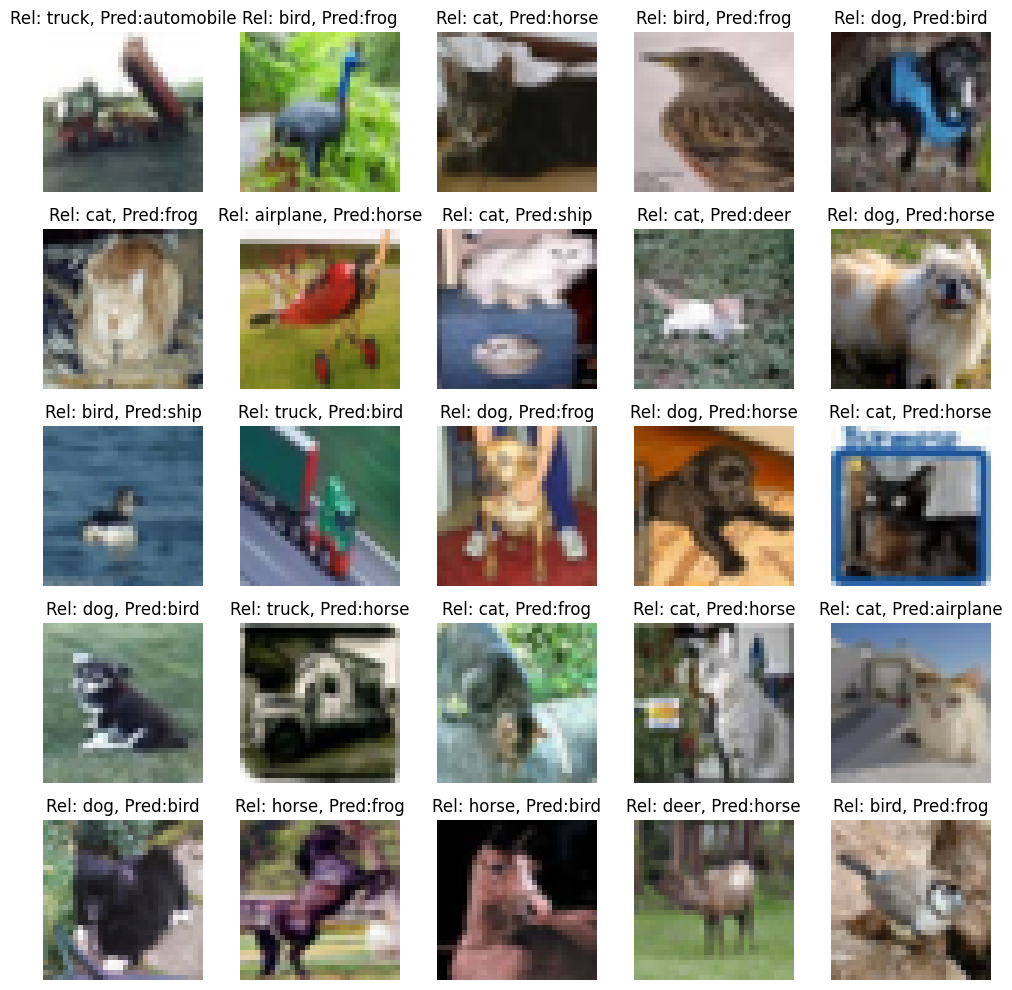

In [59]:
import matplotlib.pyplot as plt

# Ustaw liczbę wierszy i kolumn dla wyświetlania zdjęć
num_rows = 5
num_cols = 5

# Zwiększ rozmiar figury
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Wyświetl pierwsze `num_rows * num_cols` zdjęć
for i, index in enumerate(incorrect_indices[:num_rows * num_cols]):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(train_images[index], cmap='gray')
    ax.set_title(f"Rel: {class_names[train_labels[index]]}, Pred:{class_names[y_result[index]]}", fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()